In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files

# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/BLV/Forecast/RAW_DATA/P_wind.csv'

# Load the data
data = pd.read_csv(file_path, sep=',')

# Display the data
print(data.head())


                  Time      P     Q      S  windspeed  wind direct
0  2022-11-05 11:10:00  183.0  -8.5  184.0       9.13         51.1
1  2022-11-05 11:15:00  181.0 -11.0  182.0       9.71         55.9
2  2022-11-05 11:20:00  183.0 -10.4  184.0       9.65         53.5
3  2022-11-05 11:25:00  184.0 -10.6  184.0       9.24         55.8
4  2022-11-05 11:30:00  184.0 -11.0  185.0       8.81         57.1


In [26]:
# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/BLV/Forecast/PROCESSED_DATA/Hourly_weather_data.csv'

# Load the data
weather_data = pd.read_csv(file_path, sep=',')


# Display the data
print(weather_data.head())

                  Time   air temp   humidity  irrad global horizontal  \
0  2022-07-01 00:00:00  29.941667  82.991667                 0.000000   
1  2022-07-01 01:00:00  29.491667  84.450000                 0.157417   
2  2022-07-01 02:00:00  29.275000  82.858333                 0.000000   
3  2022-07-01 03:00:00  29.100000  83.125000                 0.000000   
4  2022-07-01 04:00:00  29.025000  82.716667                 0.000000   

   irrad plant of array     pressure  rain fall     temp 1     temp 2  temp 3  \
0              0.000000  1000.083333        0.0  28.433333  28.283333   -40.0   
1              0.305583   999.166667        0.0  27.875000  27.900000   -40.0   
2              0.000000   999.000000        0.0  27.716667  27.508333   -40.0   
3              0.000000   999.000000        0.0  27.216667  26.925000   -40.0   
4              0.000000   999.000000        0.0  27.366667  27.116667   -40.0   

   wind direction  wind speed  
0      230.058333    0.306333  
1      144

In [7]:
# Kiểm tra số lượng giá trị null trong cột WT
null_count = data['P'].isnull().sum()
print(f"Số lượng giá trị null trong cột WT: {null_count}")


Số lượng giá trị null trong cột WT: 7745


In [8]:
missing_value = data[data.isnull().any(axis=1)]
import pandas as pd

# Giả sử cột 'Time' là kiểu DateTime, nếu chưa bạn cần chuyển đổi nó
data['Time'] = pd.to_datetime(data['Time'])

# Lọc các hàng có giá trị thiếu
missing_value = data[data.isnull().any(axis=1)]

# Lấy các ngày từ cột 'Time' (chuyển đổi chỉ lấy ngày, không quan tâm giờ)
missing_value['Date'] = missing_value['Time'].dt.date

# Lấy danh sách các ngày bị thiếu và loại bỏ trùng lặp
missing_dates = missing_value['Date'].drop_duplicates()

# In ra danh sách các ngày bị thiếu
print(missing_dates)

9056      2022-12-06
15130     2022-12-28
15418     2022-12-29
15706     2022-12-30
15994     2022-12-31
25980     2023-02-03
27036     2023-02-07
27492     2023-02-08
129948    2024-01-30
134788    2024-02-16
167413    2024-06-08
167531    2024-06-09
199490    2024-09-28
200133    2024-09-30
201996    2024-10-06
204058    2024-10-14
204346    2024-10-15
204634    2024-10-16
204922    2024-10-17
205210    2024-10-18
205498    2024-10-19
205786    2024-10-20
206074    2024-10-21
206362    2024-10-22
206650    2024-10-23
206938    2024-10-24
207226    2024-10-25
207514    2024-10-26
207802    2024-10-27
208090    2024-10-28
208378    2024-10-29
208666    2024-10-30
208954    2024-10-31
209242    2024-11-01
209530    2024-11-02
209818    2024-11-03
210106    2024-11-04
210394    2024-11-05
Name: Date, dtype: object


<ipython-input-8-0066b583e24d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_value['Date'] = missing_value['Time'].dt.date


In [9]:
df = pd.DataFrame(data)

# Sử dụng forward fill cho tất cả các cột
df.fillna(method='ffill', inplace=True)

print(df)

                      Time      P     Q      S  windspeed  wind direct
0      2022-11-05 11:10:00  183.0  -8.5  184.0       9.13         51.1
1      2022-11-05 11:15:00  181.0 -11.0  182.0       9.71         55.9
2      2022-11-05 11:20:00  183.0 -10.4  184.0       9.65         53.5
3      2022-11-05 11:25:00  184.0 -10.6  184.0       9.24         55.8
4      2022-11-05 11:30:00  184.0 -11.0  185.0       8.81         57.1
...                    ...    ...   ...    ...        ...          ...
210524 2024-11-05 10:50:00   -8.8  -5.0   10.8       6.21        114.0
210525 2024-11-05 10:55:00   -8.8  -5.0   10.8       6.21        114.0
210526 2024-11-05 11:00:00   -8.8  -5.0   10.8       6.21        114.0
210527 2024-11-05 11:05:00   -8.8  -5.0   10.8       6.21        114.0
210528 2024-11-05 11:10:00   -8.8  -5.0   10.8       6.21        114.0

[210529 rows x 6 columns]


<ipython-input-9-f0ee5e75fb67>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
data = df

In [11]:
data.drop(columns=['Q', 'S','Date'], inplace=True, errors='ignore')
print(data)

                      Time      P  windspeed  wind direct
0      2022-11-05 11:10:00  183.0       9.13         51.1
1      2022-11-05 11:15:00  181.0       9.71         55.9
2      2022-11-05 11:20:00  183.0       9.65         53.5
3      2022-11-05 11:25:00  184.0       9.24         55.8
4      2022-11-05 11:30:00  184.0       8.81         57.1
...                    ...    ...        ...          ...
210524 2024-11-05 10:50:00   -8.8       6.21        114.0
210525 2024-11-05 10:55:00   -8.8       6.21        114.0
210526 2024-11-05 11:00:00   -8.8       6.21        114.0
210527 2024-11-05 11:05:00   -8.8       6.21        114.0
210528 2024-11-05 11:10:00   -8.8       6.21        114.0

[210529 rows x 4 columns]


In [22]:
import pandas as pd

# Giả sử bạn đã có DataFrame data với cột 'Time'

# Đảm bảo cột 'Time' là kiểu DateTime
data['Time'] = pd.to_datetime(data['Time'])

# Gộp dữ liệu theo giờ (freq='H' là giờ) và tính trung bình
hourly_wind_data = data.resample('H', on='Time').mean()

# Reset chỉ mục để giữ cột 'Time' trong DataFrame
hourly_wind_data = hourly_wind_data.reset_index()

# Kiểm tra kết quả
print(hourly_wind_data)


                     Time           P  windspeed  wind direct
0     2022-11-05 11:00:00  182.800000   9.055000    56.190000
1     2022-11-05 12:00:00  182.833333   8.315833    59.341667
2     2022-11-05 13:00:00  159.083333   8.220000    55.783333
3     2022-11-05 14:00:00  274.000000   7.690833    59.300000
4     2022-11-05 15:00:00  205.166667   7.605833    66.858333
...                   ...         ...        ...          ...
17540 2024-11-05 07:00:00   -8.800000   6.210000   114.000000
17541 2024-11-05 08:00:00   -8.800000   6.210000   114.000000
17542 2024-11-05 09:00:00   -8.800000   6.210000   114.000000
17543 2024-11-05 10:00:00   -8.800000   6.210000   114.000000
17544 2024-11-05 11:00:00   -8.800000   6.210000   114.000000

[17545 rows x 4 columns]


<ipython-input-22-5e5a5375a911>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_wind_data = data.resample('H', on='Time').mean()


In [25]:
# Đổi tên cột 'old_name1' thành 'new_name1'
hourly_wind_data.rename(columns={'P': 'P_wind'}, inplace=True)

print(hourly_wind_data)

                     Time      P_wind  windspeed  wind direct
0     2022-11-05 11:00:00  182.800000   9.055000    56.190000
1     2022-11-05 12:00:00  182.833333   8.315833    59.341667
2     2022-11-05 13:00:00  159.083333   8.220000    55.783333
3     2022-11-05 14:00:00  274.000000   7.690833    59.300000
4     2022-11-05 15:00:00  205.166667   7.605833    66.858333
...                   ...         ...        ...          ...
17540 2024-11-05 07:00:00   -8.800000   6.210000   114.000000
17541 2024-11-05 08:00:00   -8.800000   6.210000   114.000000
17542 2024-11-05 09:00:00   -8.800000   6.210000   114.000000
17543 2024-11-05 10:00:00   -8.800000   6.210000   114.000000
17544 2024-11-05 11:00:00   -8.800000   6.210000   114.000000

[17545 rows x 4 columns]


In [27]:
# Convert 'Time' column in both DataFrames to datetime objects
hourly_wind_data['Time'] = pd.to_datetime(hourly_wind_data['Time'])
weather_data['Time'] = pd.to_datetime(weather_data['Time'])

# Now perform the merge
merged_df = pd.merge(hourly_wind_data, weather_data, on='Time', how='inner')
print(merged_df)

                     Time      P_wind  windspeed  wind direct   air temp  \
0     2022-11-05 11:00:00  182.800000   9.055000    56.190000  24.883333   
1     2022-11-05 12:00:00  182.833333   8.315833    59.341667  24.366667   
2     2022-11-05 13:00:00  159.083333   8.220000    55.783333  24.158333   
3     2022-11-05 14:00:00  274.000000   7.690833    59.300000  24.841667   
4     2022-11-05 15:00:00  205.166667   7.605833    66.858333  24.516667   
...                   ...         ...        ...          ...        ...   
10136 2024-01-01 19:00:00  141.750000   5.941667    95.433333  22.058333   
10137 2024-01-01 20:00:00  108.258333   5.500833    94.958333  21.858333   
10138 2024-01-01 21:00:00   90.933333   5.266667    92.500000  21.725000   
10139 2024-01-01 22:00:00   82.341667   4.992500    85.850000  21.716667   
10140 2024-01-01 23:00:00   76.383333   4.853333    96.533333  21.516667   

        humidity  irrad global horizontal  irrad plant of array     pressure  \
0      

In [28]:
# Tạo các cột đặc tính thời gian từ cột 'Time'
# merged_df = merged_df.reset_index() # No need to reset the index if 'Time' is already the index
merged_df['Time'] = pd.to_datetime(merged_df['Time'])  # Chuyển đổi cột Time thành kiểu datetime nếu cần
merged_df.set_index('Time', inplace=True)
merged_df['year'] = merged_df.index.year  # Access year from the DateTimeIndex
merged_df['month'] = merged_df.index.month # Access month from the DateTimeIndex
merged_df['day'] = merged_df.index.day   # Access day from the DateTimeIndex
merged_df['hour'] = merged_df.index.hour  # Access hour from the DateTimeIndex

merged_df['week'] = merged_df.index.isocalendar().week
#merged_df = merged_df.set_index('Time') # 'Time' is already the index
#merged_df['hour'] = [x for x in merged_df.index.hour]
merged_df['weekday'] = merged_df.index.dayofweek + 1 # Monday=1, Sunday=7
merged_df['day'] = merged_df.index.day  # Already calculated above
merged_df['day_str'] = merged_df.index.strftime('%a')
merged_df['year_month'] = merged_df.index.strftime('%Y_%m')


# Kiểm tra kết quả
print(merged_df.head())

                         P_wind  windspeed  wind direct   air temp   humidity  \
Time                                                                            
2022-11-05 11:00:00  182.800000   9.055000    56.190000  24.883333  72.000000   
2022-11-05 12:00:00  182.833333   8.315833    59.341667  24.366667  74.075000   
2022-11-05 13:00:00  159.083333   8.220000    55.783333  24.158333  74.983333   
2022-11-05 14:00:00  274.000000   7.690833    59.300000  24.841667  72.066667   
2022-11-05 15:00:00  205.166667   7.605833    66.858333  24.516667  72.808333   

                     irrad global horizontal  irrad plant of array  \
Time                                                                 
2022-11-05 11:00:00               416.750000            356.583333   
2022-11-05 12:00:00               286.416667            269.000000   
2022-11-05 13:00:00               294.583333            277.083333   
2022-11-05 14:00:00               380.750000            366.000000   
2022-11-05 1

In [30]:
hourly_wind_data = merged_df

In [31]:
hourly_wind_data['cosine'] = np.cos(np.radians(hourly_wind_data['wind direct']))
hourly_wind_data['sine'] = np.sin(np.radians(hourly_wind_data['wind direct']))

In [32]:
hourly_wind_data.describe(include = 'all')

,P_wind,windspeed,wind direct,air temp,humidity,irrad global horizontal,irrad plant of array,pressure,rain fall,temp 1,...,year,month,day,hour,week,weekday,day_str,year_month,cosine,sine
count,10141.000000,10141.000000,10141.000000,10045.000000,10045.000000,10045.000000,10045.000000,10045.000000,10045.000000,10045.000000,...,10141.000000,10141.000000,10141.000000,10141.000000,10141.0,10141.000000,10141,10141,10141.000000,10141.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,<NA>,NaN,7,15,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,<NA>,NaN,Sun,2022_12,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,<NA>,NaN,1464,744,NaN,NaN
mean,128.185812,7.094275,125.271806,25.045712,81.250770,169.062591,153.324724,1010.099799,0.000072,28.166967,...,2022.868553,7.184992,15.827335,11.507051,29.419189,4.002564,NaN,NaN,-0.134171,0.468955
std,125.084619,3.664758,69.898362,4.812273,8.895949,265.317168,242.943685,6.893075,0.001372,9.974194,...,0.344838,3.649173,8.760852,6.922185,15.907322,2.006005,NaN,NaN,0.588346,0.644983
min,-11.416667,0.000000,8.561667,11.891667,45.666667,0.000000,0.000000,993.000000,0.000000,10.658333,...,2022.000000,1.000000,1.000000,0.000000,1.0,1.000000,NaN,NaN,-0.999999,-0.999999
25%,-8.284167,4.300833,68.008333,21.233333,76.716667,0.000000,0.000000,1004.000000,0.000000,21.175000,...,2023.000000,4.000000,8.000000,6.000000,15.0,2.000000,NaN,NaN,-0.747025,-0.172216
50%,114.000000,6.908333,100.283333,25.700000,83.233333,4.354167,4.075000,1010.000000,0.000000,26.100000,...,2023.000000,7.000000,16.000000,12.000000,31.0,4.000000,NaN,NaN,-0.058435,0.847894
75%,232.333333,9.580833,190.083333,29.058333,88.000000,248.166667,229.666667,1015.083333,0.000000,32.066667,...,2023.000000,11.000000,23.000000,18.000000,45.0,6.000000,NaN,NaN,0.401548,0.946462


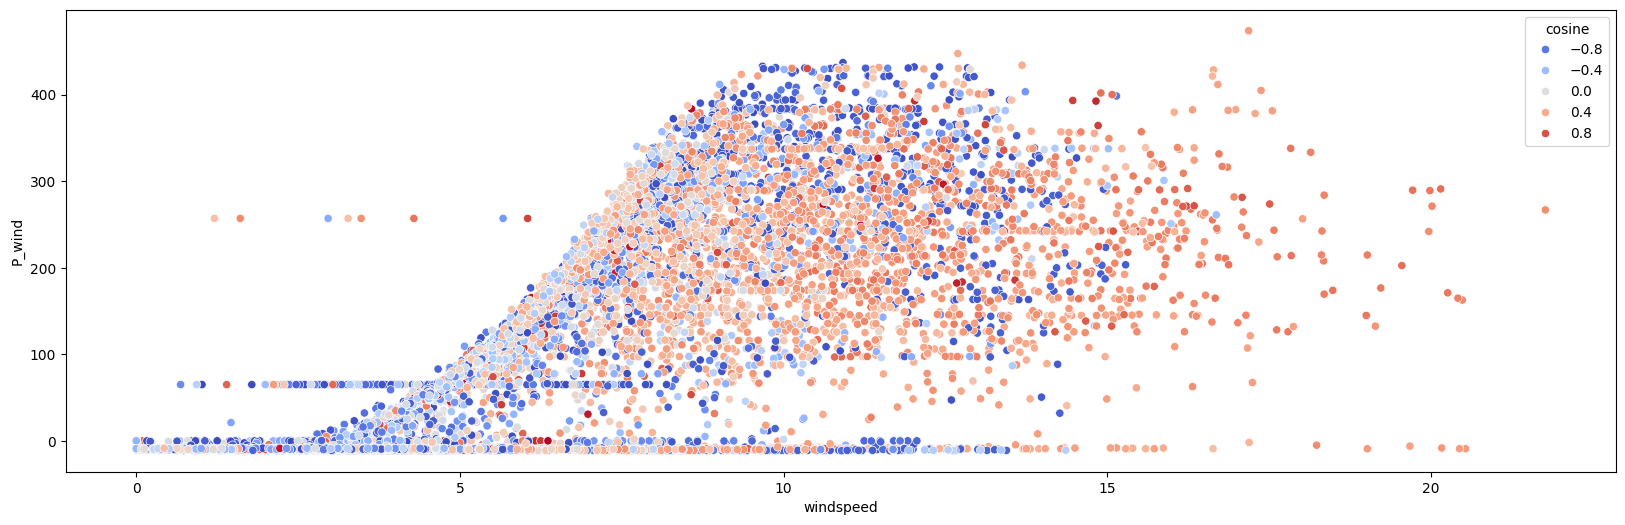

In [62]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
import seaborn as sns # Import seaborn
# Hiển thị các điểm
plt.figure(figsize=(20, 6))
sns.scatterplot(x='windspeed', y='P_wind', data=hourly_wind_data, palette="coolwarm", hue = 'cosine')
plt.show()

In [34]:
import plotly.express as px
fig = px.scatter_3d(hourly_wind_data, x='P_wind', y='windspeed', z='wind direct', color='cosine',
# Tạo màu tự động dựa trên cột 'value'
color_continuous_scale='Viridis',
# Dải màu liên tục (Viridis)
title='Biểu đồ 3 trục với dải màu tự động' )
fig.update_traces(marker=dict(size=2))
fig.update_layout(width=1000, height=800)
fig.show()

In [63]:
hourly_wind_data['remove'] = (  # Điều kiện 1
    (hourly_wind_data['P_wind'] > 200) &(hourly_wind_data['P_wind'] < 300) & (hourly_wind_data['windspeed'] < 6.1 )|
     (hourly_wind_data['P_wind'] < 0) |#(hourly_wind_data['windspeed'] < 2.5) |(hourly_wind_data['windspeed'] > 10) |
    (hourly_wind_data['P_wind'] ==  65 ) & (hourly_wind_data['windspeed'] < 4.5 )
    #|(merged_df['irrad global horizontal'] < 0)
    )
# Lọc bỏ các hàng có cột 'remove' bằng True
clean_data =hourly_wind_data[~hourly_wind_data['remove']].drop(columns=['remove'])

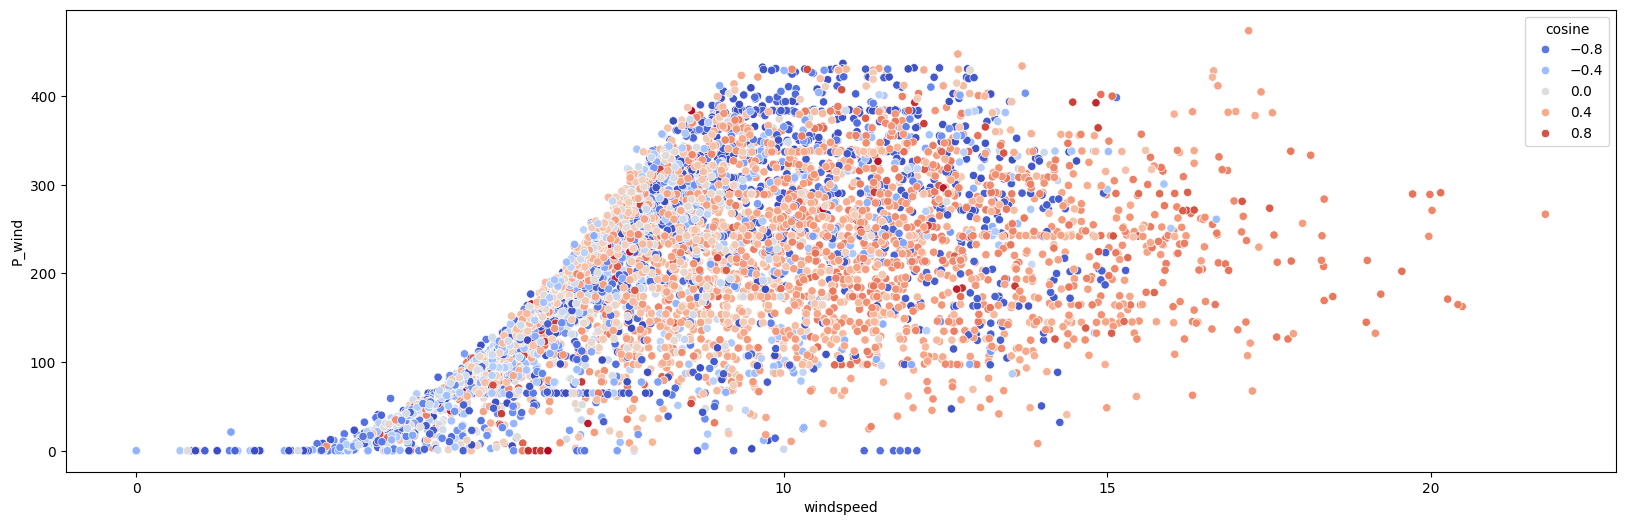

In [64]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='windspeed', y='P_wind', data=clean_data, palette="coolwarm", hue = 'cosine')
plt.show()

In [104]:
# Tạo một cột mới để phân nhóm P_wind theo độ chia 0.1
clean_data['P_wind_bin'] = (clean_data['P_wind'] // 1) * 1

# Tìm giá trị windspeed nhỏ nhất trong mỗi nhóm P_wind_bin
min_points = clean_data.loc[clean_data.groupby('P_wind_bin')['windspeed'].idxmin()]

# Loại bỏ cột phụ nếu không cần thiết
min_points = min_points.drop(columns=['P_wind_bin'])

print("Các điểm với windspeed nhỏ nhất trong mỗi nhóm P_wind chia theo 0.1:")
print(min_points)


Các điểm với windspeed nhỏ nhất trong mỗi nhóm P_wind chia theo 0.1:
                         P_wind  windspeed  wind direct   air temp   humidity  \
Time                                                                            
2022-11-05 22:00:00    0.000000   0.000000    92.500000  23.091667  80.200000   
2023-08-14 15:00:00    1.633333   2.905833   244.833333  32.633333  72.675000   
2023-05-07 09:00:00    2.450000   4.633333   179.500000  29.516667  81.600000   
2023-05-10 19:00:00    3.450000   3.068333   136.833333  27.166667  91.000000   
2023-05-28 11:00:00    4.283333   3.587500    99.266667  32.691667  72.208333   
...                         ...        ...          ...        ...        ...   
2023-06-22 00:00:00  432.833333   9.674167   198.250000  29.741667  89.000000   
2023-12-21 18:00:00  434.083333  13.683333    66.541667  14.933333  68.066667   
2023-05-20 23:00:00  437.083333  10.916667   191.916667  27.741667  91.000000   
2023-12-21 17:00:00  447.583333  12.6916

In [105]:
# Tạo một cột mới để phân nhóm windspeed theo độ chia 0.1
clean_data['windspeed_bin'] = (clean_data['windspeed'] // 0.05) * 0.05

# Tìm giá trị P_wind lớn nhất trong mỗi nhóm windspeed_bin
max_points = clean_data.loc[clean_data.groupby('windspeed_bin')['P_wind'].idxmax()]

# Loại bỏ cột phụ nếu không cần thiết
max_points = max_points.drop(columns=['windspeed_bin'])

print("Các điểm với P_wind lớn nhất trong mỗi nhóm windspeed chia theo 0.1:")
print(max_points)


Các điểm với P_wind lớn nhất trong mỗi nhóm windspeed chia theo 0.1:
                         P_wind  windspeed  wind direct   air temp   humidity  \
Time                                                                            
2022-11-05 22:00:00    0.000000   0.000000    92.500000  23.091667  80.200000   
2023-06-14 11:00:00    0.000000   0.676667   108.991667  30.958333  78.925000   
2023-06-14 14:00:00    0.000000   0.791333    89.358333  32.216667  76.100000   
2023-06-12 08:00:00    0.000000   0.838750   146.416667  31.050000  81.308333   
2023-06-15 09:00:00    0.000000   0.915167   186.750000  28.508333  90.083333   
...                         ...        ...          ...        ...        ...   
2023-11-16 10:00:00  291.083333  20.150000    46.800000  21.891667  69.858333   
2023-11-16 07:00:00  171.083333  20.258333    49.808333  21.175000  78.725000   
2022-12-17 09:00:00  164.916667  20.416667    52.091667  17.316667  61.841667   
2022-12-17 08:00:00  162.750000  20.4833

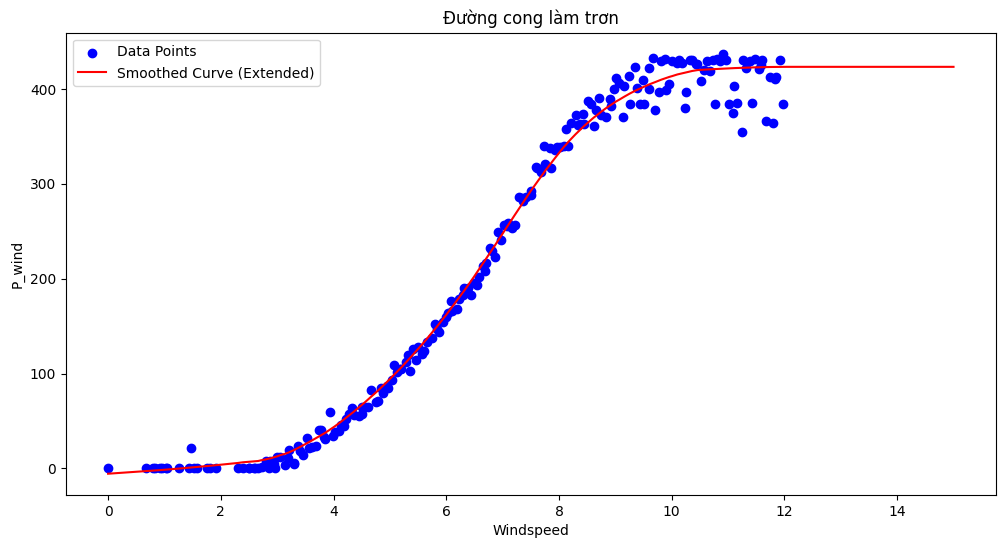

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Lọc dữ liệu (như trong đoạn mã của bạn)
new_max_points = max_points[(max_points['windspeed'] < 12)]
x = new_max_points['windspeed']
y = new_max_points['P_wind']

# Áp dụng làm trơn bằng LOWESS
lowess = sm.nonparametric.lowess(y, x, frac=0.3)
x_smooth = lowess[:, 0]
y_smooth = lowess[:, 1]

# Lấy giá trị cuối cùng của x và y
last_x = x_smooth[-1]
last_y = y_smooth[-1]

# Kéo dài đường cong bằng cách thêm các giá trị x và y
x_extend = np.linspace(last_x, 15, 50)  # Thêm 50 điểm từ cuối đến 15
y_extend = np.full_like(x_extend, last_y)  # Giữ nguyên giá trị y cuối cùng

# Gộp phần đã làm trơn và phần mở rộng
x_final = np.concatenate([x_smooth, x_extend])
y_final = np.concatenate([y_smooth, y_extend])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_final, y_final, color='red', label='Smoothed Curve (Extended)')

plt.title('Đường cong làm trơn')
plt.xlabel('Windspeed')
plt.ylabel('P_wind')
plt.legend()
plt.show()


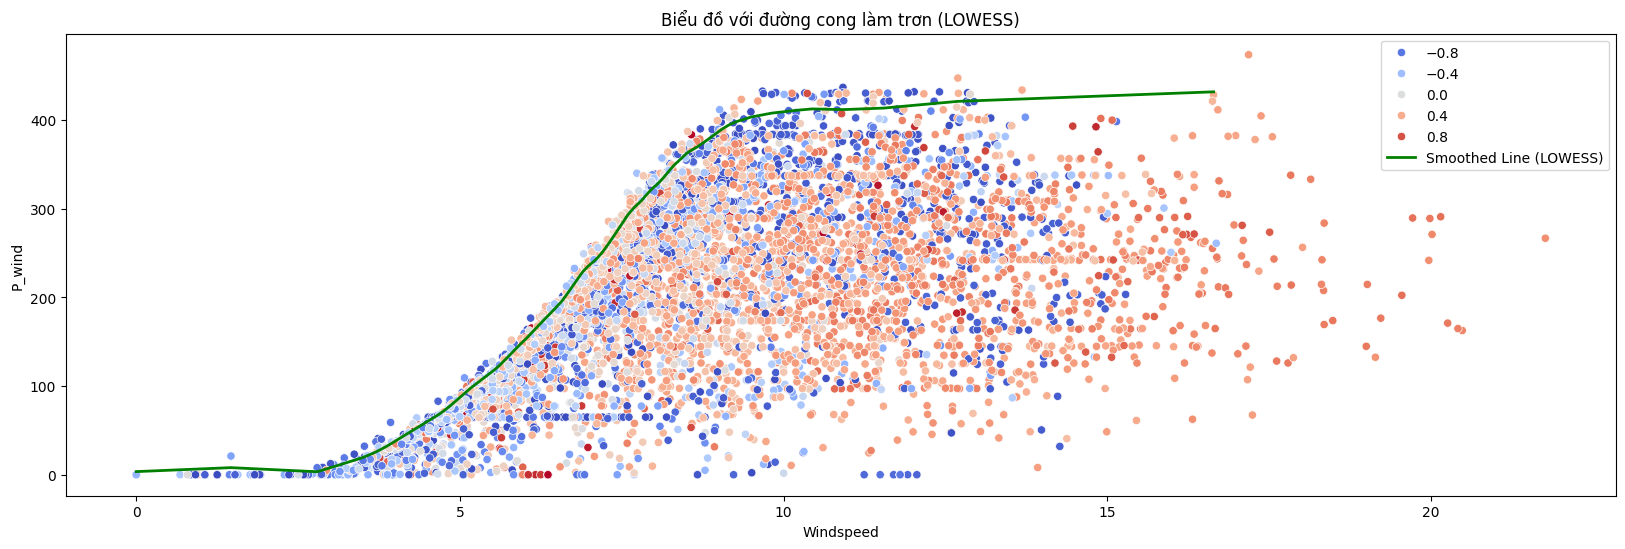

Khoảng cách từ các điểm đến đường cong làm trơn:
Time
2022-11-05 11:00:00    207.396436
2022-11-05 12:00:00    166.968951
2022-11-05 13:00:00    182.767351
2022-11-05 14:00:00     27.408859
2022-11-05 15:00:00     89.168398
                          ...    
2024-01-01 19:00:00      6.015474
2024-01-01 20:00:00      8.192034
2024-01-01 21:00:00     12.504968
2024-01-01 22:00:00      4.375836
2024-01-01 23:00:00      1.632232
Name: P_wind, Length: 7015, dtype: float64


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

min_points = min_points[(min_points['windspeed'] < 17)]
# Lấy dữ liệu x và y từ các điểm đã lọc
x = min_points['windspeed']
y = min_points['P_wind']

# Áp dụng làm trơn bằng lowess
lowess = sm.nonparametric.lowess(y, x, frac=0.1)  # Tăng/giảm frac để thay đổi độ mượt
x_smooth = lowess[:, 0]
y_smooth = lowess[:, 1]

# Vẽ biểu đồ với đường làm trơn
plt.figure(figsize=(20, 6))
sns.scatterplot(x='windspeed', y='P_wind', hue='cosine', data=clean_data, palette='coolwarm')
plt.plot(x_smooth, y_smooth, color='green', linewidth=2, label='Smoothed Line (LOWESS)')

plt.title('Biểu đồ với đường cong làm trơn (LOWESS)')
plt.xlabel('Windspeed')
plt.ylabel('P_wind')
plt.legend()
plt.show()

# Tính khoảng cách từ các điểm dữ liệu đến đường làm trơn
from scipy.interpolate import interp1d

# Tạo hàm nội suy tuyến tính từ đường làm trơn
f_interp_smooth = interp1d(x_smooth, y_smooth, kind='linear', fill_value='extrapolate')

# Tính giá trị dự đoán y trên đường cong cho từng giá trị x của dữ liệu gốc
y_pred_smooth = f_interp_smooth(clean_data['windspeed'])
distances_smooth = np.abs(clean_data['P_wind'] - y_pred_smooth)

# Lưu khoảng cách vào DataFrame nếu cần
clean_data['distance_to_smooth_curve'] = distances_smooth

print("Khoảng cách từ các điểm đến đường cong làm trơn:")
print(distances_smooth)


In [113]:
q1=clean_data['distance_to_smooth_curve'].quantile(0.25)
print(q1)
q3=clean_data['distance_to_smooth_curve'].quantile(0.75)
print(q3)
q2=clean_data['distance_to_smooth_curve'].quantile(0.5)
final_q = q3 + 1.5 * (q3 - q1)

print(final_q)
print(q2)

17.135891474245255
164.3733836535028
385.22962192238913
62.747563986827956


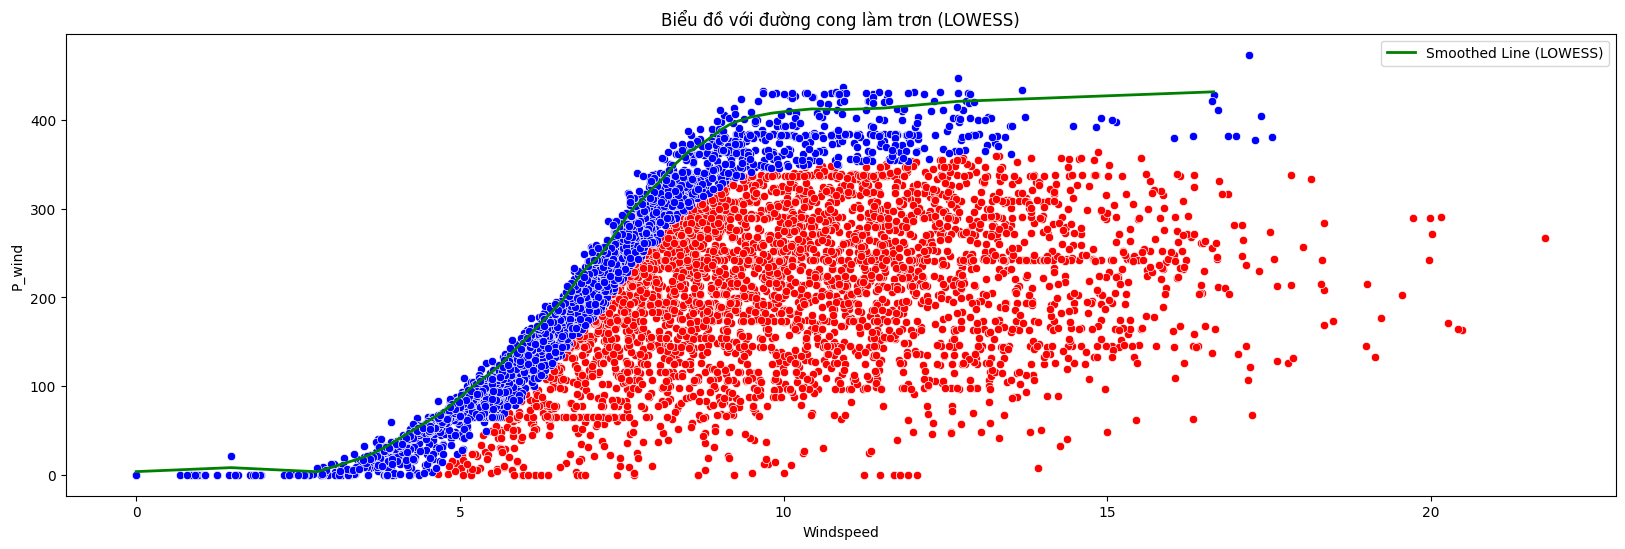

In [114]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
# Dữ liệu và khoảng cách an toàn
# Giả sử `filtered_data` là DataFrame chứa các cột 'PV' và 'irrad global horizontal'
safe_distance = 62.747563986827956 # Ví dụ khoảng cách an toàn

# Lọc các điểm trong và ngoài khoảng cách an toàn
points_within_safe_distance = clean_data[clean_data['distance_to_smooth_curve'] <= safe_distance]
points_outside_safe_distance = clean_data[clean_data['distance_to_smooth_curve'] > safe_distance]

# Hiển thị các điểm
plt.figure(figsize=(20, 6))

#sns.regplot(x='PV', y='irrad global horizontal', data=points_within_safe_distance, line_kws={"color": "red"})
sns.scatterplot(x='windspeed', y='P_wind', data=points_outside_safe_distance, color='red')
sns.scatterplot(x='windspeed', y='P_wind', data=points_within_safe_distance, color='blue')
plt.plot(x_smooth, y_smooth, color='green', linewidth=2, label='Smoothed Line (LOWESS)')

plt.title('Biểu đồ với đường cong làm trơn (LOWESS)')
plt.xlabel('Windspeed')
plt.ylabel('P_wind')
plt.legend()
plt.show()


In [115]:
points_within_safe_distance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3508 entries, 2022-11-05 14:00:00 to 2024-01-01 23:00:00
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   P_wind                    3508 non-null   float64
 1   windspeed                 3508 non-null   float64
 2   wind direct               3508 non-null   float64
 3   air temp                  3508 non-null   float64
 4   humidity                  3508 non-null   float64
 5   irrad global horizontal   3508 non-null   float64
 6   irrad plant of array      3508 non-null   float64
 7   pressure                  3508 non-null   float64
 8   rain fall                 3508 non-null   float64
 9   temp 1                    3508 non-null   float64
 10  temp 2                    3508 non-null   float64
 11  temp 3                    3508 non-null   float64
 12  wind direction            3508 non-null   float64
 13  wind speed                3

In [122]:
columns_to_drop = ['index','Unnamed: 0','P_y','cosine','sine','distance','P_wind_bin','windspeed_bin','distance_to_smooth_curve','distance']
final_df = points_within_safe_distance.drop(columns=columns_to_drop, errors='ignore')

In [123]:
final_df.describe()

,P_wind,windspeed,wind direct,air temp,humidity,irrad global horizontal,irrad plant of array,pressure,rain fall,temp 1,temp 2,temp 3,wind direction,wind speed,year,month,day,hour,week,weekday
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.0,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.0,3508.000000
mean,173.985080,6.419668,129.987486,25.834587,82.596522,129.678592,118.616554,1009.066534,0.000066,27.979524,27.914097,-40.0,202.494175,1.265616,2022.887400,7.472064,15.948974,12.384265,30.663911,4.061288
std,118.944561,2.407961,69.206415,4.250357,7.521443,228.459347,209.975792,6.493665,0.001122,8.776403,8.953518,0.0,101.075198,0.844581,0.331986,3.405168,8.744478,7.154732,15.012368,2.043009
min,0.000000,0.000000,10.102500,13.666667,48.558333,0.000000,0.000000,993.000000,0.000000,10.758333,10.130000,-40.0,36.741667,0.000000,2022.000000,1.000000,1.000000,0.000000,1.0,1.000000
25%,77.332708,5.146875,75.731250,22.583333,78.993750,0.000000,0.000000,1003.000000,0.000000,22.331250,22.191667,-40.0,88.785417,0.654167,2023.000000,5.000000,9.000000,6.000000,19.0,2.000000
50%,152.625000,6.296250,103.745833,26.500000,84.054167,0.216667,0.191667,1009.416667,0.000000,26.608333,26.508333,-40.0,230.416667,0.980333,2023.000000,8.000000,16.000000,13.000000,32.0,4.000000
75%,263.479167,7.571042,194.250000,29.408333,88.000000,163.854167,152.037500,1014.416667,0.000000,29.991667,29.979167,-40.0,294.333333,1.812500,2023.000000,11.000000,24.000000,19.000000,45.0,6.000000
max,473.916667,17.550000,353.916667,35.233333,94.000000,981.833333,966.333333,1027.583333,0.033333,60.700000,60.608333,-40.0,360.000000,4.650000,2024.000000,12.000000,31.000000,23.000000,52.0,7.000000


In [124]:
# Đổi tên cột 'old_name1' thành 'new_name1'
final_df.rename(columns={'P_wind': 'P'}, inplace=True)

print(final_df)

                              P  windspeed  wind direct   air temp   humidity  \
Time                                                                            
2022-11-05 14:00:00  274.000000   7.690833    59.300000  24.841667  72.066667   
2022-11-05 18:00:00  259.583333   7.807500    78.308333  22.900000  79.883333   
2022-11-05 22:00:00    0.000000   0.000000    92.500000  23.091667  80.200000   
2022-11-05 23:00:00    0.000000   0.000000    92.500000  22.966667  81.383333   
2022-11-06 00:00:00    0.000000   0.000000    92.500000  23.033333  81.883333   
...                         ...        ...          ...        ...        ...   
2024-01-01 19:00:00  141.750000   5.941667    95.433333  22.058333  89.433333   
2024-01-01 20:00:00  108.258333   5.500833    94.958333  21.858333  90.000000   
2024-01-01 21:00:00   90.933333   5.266667    92.500000  21.725000  90.308333   
2024-01-01 22:00:00   82.341667   4.992500    85.850000  21.716667  91.000000   
2024-01-01 23:00:00   76.383

In [125]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3508 entries, 2022-11-05 14:00:00 to 2024-01-01 23:00:00
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P                        3508 non-null   float64
 1   windspeed                3508 non-null   float64
 2   wind direct              3508 non-null   float64
 3   air temp                 3508 non-null   float64
 4   humidity                 3508 non-null   float64
 5   irrad global horizontal  3508 non-null   float64
 6   irrad plant of array     3508 non-null   float64
 7   pressure                 3508 non-null   float64
 8   rain fall                3508 non-null   float64
 9   temp 1                   3508 non-null   float64
 10  temp 2                   3508 non-null   float64
 11  temp 3                   3508 non-null   float64
 12  wind direction           3508 non-null   float64
 13  wind speed               3508 non-null   f

In [126]:
#Lưu về máy kết quả
final = pd.DataFrame(final_df)

# Lưu DataFrame vào tệp Excel
final.to_excel('finalized_wind_data.xlsx', index=True)

print("Dữ liệu đã được lưu vào tệp data.xlsx")
from google.colab import files

# Tải tệp xuống máy tính
files.download('finalized_wind_data.xlsx')

Dữ liệu đã được lưu vào tệp data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
#Lưu về máy kết quả
final = pd.DataFrame(final_df)

# Lưu DataFrame vào tệp csv
final.to_csv('finalized_wind_data.csv', index=True)

print("Dữ liệu đã được lưu vào tệp data.csv")
from google.colab import files

# Tải tệp xuống máy tính
files.download('finalized_wind_data.csv')

Dữ liệu đã được lưu vào tệp data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>